In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tpu-getting-started/sample_submission.csv
/kaggle/input/tpu-getting-started/tfrecords-jpeg-224x224/val/09-224x224-232.tfrec
/kaggle/input/tpu-getting-started/tfrecords-jpeg-224x224/val/14-224x224-232.tfrec
/kaggle/input/tpu-getting-started/tfrecords-jpeg-224x224/val/01-224x224-232.tfrec
/kaggle/input/tpu-getting-started/tfrecords-jpeg-224x224/val/13-224x224-232.tfrec
/kaggle/input/tpu-getting-started/tfrecords-jpeg-224x224/val/00-224x224-232.tfrec
/kaggle/input/tpu-getting-started/tfrecords-jpeg-224x224/val/07-224x224-232.tfrec
/kaggle/input/tpu-getting-started/tfrecords-jpeg-224x224/val/12-224x224-232.tfrec
/kaggle/input/tpu-getting-started/tfrecords-jpeg-224x224/val/11-224x224-232.tfrec
/kaggle/input/tpu-getting-started/tfrecords-jpeg-224x224/val/05-224x224-232.tfrec
/kaggle/input/tpu-getting-started/tfrecords-jpeg-224x224/val/04-224x224-232.tfrec
/kaggle/input/tpu-getting-started/tfrecords-jpeg-224x224/val/15-224x224-232.tfrec
/kaggle/input/tpu-getting-started/tfrecord

In [2]:
import tensorflow as tf
import numpy as np
import os
import glob
import warnings

warnings.filterwarnings('ignore')
ROOT_DIR = '/kaggle/input/tpu-getting-started'

In [3]:
CLASSES = ['pink primrose',    'hard-leaved pocket orchid', 'canterbury bells', 'sweet pea',     'wild geranium',     'tiger lily',           'moon orchid',              'bird of paradise', 'monkshood',        'globe thistle',         # 00 - 09
           'snapdragon',       "colt's foot",               'king protea',      'spear thistle', 'yellow iris',       'globe-flower',         'purple coneflower',        'peruvian lily',    'balloon flower',   'giant white arum lily', # 10 - 19
           'fire lily',        'pincushion flower',         'fritillary',       'red ginger',    'grape hyacinth',    'corn poppy',           'prince of wales feathers', 'stemless gentian', 'artichoke',        'sweet william',         # 20 - 29
           'carnation',        'garden phlox',              'love in the mist', 'cosmos',        'alpine sea holly',  'ruby-lipped cattleya', 'cape flower',              'great masterwort', 'siam tulip',       'lenten rose',           # 30 - 39
           'barberton daisy',  'daffodil',                  'sword lily',       'poinsettia',    'bolero deep blue',  'wallflower',           'marigold',                 'buttercup',        'daisy',            'common dandelion',      # 40 - 49
           'petunia',          'wild pansy',                'primula',          'sunflower',     'lilac hibiscus',    'bishop of llandaff',   'gaura',                    'geranium',         'orange dahlia',    'pink-yellow dahlia',    # 50 - 59
           'cautleya spicata', 'japanese anemone',          'black-eyed susan', 'silverbush',    'californian poppy', 'osteospermum',         'spring crocus',            'iris',             'windflower',       'tree poppy',            # 60 - 69
           'gazania',          'azalea',                    'water lily',       'rose',          'thorn apple',       'morning glory',        'passion flower',           'lotus',            'toad lily',        'anthurium',             # 70 - 79
           'frangipani',       'clematis',                  'hibiscus',         'columbine',     'desert-rose',       'tree mallow',          'magnolia',                 'cyclamen ',        'watercress',       'canna lily',            # 80 - 89
           'hippeastrum ',     'bee balm',                  'pink quill',       'foxglove',      'bougainvillea',     'camellia',             'mallow',                   'mexican petunia',  'bromelia',         'blanket flower',        # 90 - 99
           'trumpet creeper',  'blackberry lily',           'common tulip',     'wild rose'] 

In [4]:
TRAIN_DIRS = glob.glob(str(ROOT_DIR + '/*-jpeg-224*/train/*'))
VAL_DIRS = glob.glob(str(ROOT_DIR + '/*-jpeg-224*/val/*'))
TEST_DIRS = glob.glob(str(ROOT_DIR + '/*-jpeg-224*/test/*'))

In [5]:
TRAIN_LEN = sum(1 for _ in tf.data.TFRecordDataset(TRAIN_DIRS, num_parallel_reads=tf.data.AUTOTUNE))
VAL_LEN = sum(1 for _ in tf.data.TFRecordDataset(VAL_DIRS, num_parallel_reads=tf.data.AUTOTUNE))
TEST_LEN = sum(1 for _ in tf.data.TFRecordDataset(TEST_DIRS, num_parallel_reads=tf.data.AUTOTUNE))
TRAIN_LEN, VAL_LEN, TEST_LEN

2022-09-21 05:03:37.754991: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-21 05:03:37.850872: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-21 05:03:37.851659: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-21 05:03:37.854501: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

(12753, 3712, 7382)

In [6]:
IMAGE_SHAPE = (224, 224, 3)

def augment(image, label):
    image = tf.image.random_brightness(image, max_delta=0.2)
    image = tf.image.random_contrast(image, lower=0.3, upper=1.7)
    image = tf.image.random_hue(image, max_delta=0.05)
    image = tf.image.random_saturation(image, 0.7, 1.3)
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_flip_up_down(image)
    return image, label

def train_tfrecord(example):
    TFREC_FORMAT = {
        'image': tf.io.FixedLenFeature([], tf.string), 
        'class': tf.io.FixedLenFeature([], tf.int64)
    }
    example = tf.io.parse_single_example(example, TFREC_FORMAT)
    image = tf.image.decode_jpeg(example['image'], channels=3)
    image = tf.reshape(image, IMAGE_SHAPE)
    image = tf.cast(image, tf.float32) / 255.0
    label = tf.cast(example['class'], tf.int32)
    label = tf.one_hot(label, depth=len(CLASSES))
    return image, label

def test_tfrecord(example):
    TFREC_FORMAT = {
        'image': tf.io.FixedLenFeature([], tf.string), 
        'id': tf.io.FixedLenFeature([], tf.string)
    }
    example = tf.io.parse_single_example(example, TFREC_FORMAT)
    image = tf.image.decode_jpeg(example['image'], channels=3)
    image = tf.reshape(image, IMAGE_SHAPE)
    image = tf.cast(image, tf.float32) / 255.0
    idn = example['id']
    return image, idn

def load_dataset(dirs, train=True, label=True, batch_size=32):
    dataset = tf.data.TFRecordDataset(dirs, num_parallel_reads=tf.data.AUTOTUNE)
    options = tf.data.Options()
    options.experimental_deterministic = False if train else True
    dataset = dataset.with_options(options)
    dataset = dataset.map(train_tfrecord if label else test_tfrecord, 
                          num_parallel_calls=tf.data.AUTOTUNE)
    if train:
        dataset = dataset.map(augment, num_parallel_calls=tf.data.AUTOTUNE)
        dataset = dataset.repeat().shuffle(2048)
    dataset = dataset.batch(batch_size)
    dataset = dataset.prefetch(tf.data.AUTOTUNE)
    return dataset

In [7]:
BATCH_SIZE = 16
train_dataset = load_dataset(TRAIN_DIRS, train=True, label=True, batch_size=BATCH_SIZE)
val_dataset = load_dataset(VAL_DIRS, train=False, label=True, batch_size=BATCH_SIZE)
test_dataset = load_dataset(TEST_DIRS, train=False, label=False, batch_size=BATCH_SIZE)

print(train_dataset)
print(val_dataset)
print(test_dataset)

<PrefetchDataset shapes: ((None, 224, 224, 3), (None, 104)), types: (tf.float32, tf.float32)>
<PrefetchDataset shapes: ((None, 224, 224, 3), (None, 104)), types: (tf.float32, tf.float32)>
<PrefetchDataset shapes: ((None, 224, 224, 3), (None,)), types: (tf.float32, tf.string)>


In [8]:
pretrained_model = tf.keras.applications.VGG16(
        weights='imagenet',
        include_top=False ,
        input_shape=[224, 224, 3]
    )
pretrained_model.trainable = False
    
model = tf.keras.Sequential([
    # To a base pretrained on ImageNet to extract features from images...
    pretrained_model,
    # ... attach a new head to act as a classifier.
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(len(CLASSES))
])

58900480/58889256 [==============================] - 1s 0us/step


In [9]:
import tensorflow_addons as tfa
model.compile(optimizer='adam', 
             loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), 
             metrics=['accuracy', tfa.metrics.F1Score(num_classes=len(CLASSES), average='macro')])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
global_average_pooling2d (Gl (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 104)               53352     
Total params: 14,768,040
Trainable params: 53,352
Non-trainable params: 14,714,688
_________________________________________________________________


In [10]:
callbacks = [
    tf.keras.callbacks.EarlyStopping(
        monitor='val_f1_score', mode='max', patience=20),
    tf.keras.callbacks.ModelCheckpoint(
        'model.h5', monitor='val_f1_score', mode='max', 
        save_best_only=True, save_weights_only=True)
]
history = model.fit(train_dataset, epochs=200, validation_data=val_dataset, 
         steps_per_epoch=TRAIN_LEN // BATCH_SIZE, callbacks=callbacks)

Epoch 1/200


2022-09-21 05:04:03.033681: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


797/797 [==============================] - 57s 54ms/step - loss: 3.6657 - accuracy: 0.1775 - f1_score: 0.0370 - val_loss: 3.1673 - val_accuracy: 0.2616 - val_f1_score: 0.0801
Epoch 2/200
797/797 [==============================] - 40s 50ms/step - loss: 3.0255 - accuracy: 0.2981 - f1_score: 0.1277 - val_loss: 2.7316 - val_accuracy: 0.3726 - val_f1_score: 0.1911
Epoch 3/200
797/797 [==============================] - 39s 48ms/step - loss: 2.7109 - accuracy: 0.3658 - f1_score: 0.2135 - val_loss: 2.4604 - val_accuracy: 0.4472 - val_f1_score: 0.2816
Epoch 4/200
797/797 [==============================] - 39s 49ms/step - loss: 2.4883 - accuracy: 0.4191 - f1_score: 0.2746 - val_loss: 2.2923 - val_accuracy: 0.4547 - val_f1_score: 0.3117
Epoch 5/200
797/797 [==============================] - 39s 48ms/step - loss: 2.3435 - accuracy: 0.4480 - f1_score: 0.3305 - val_loss: 2.1516 - val_accuracy: 0.4887 - val_f1_score: 0.3632
Epoch 6/200
797/797 [==============================] - 39s 49ms/step - loss: 

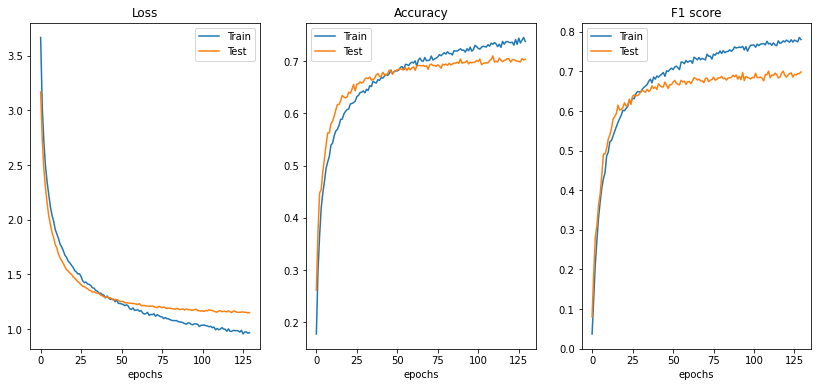

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 6))
plt.subplot(131)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Test')
plt.title('Loss')
plt.xlabel('epochs')
plt.legend()

plt.subplot(132)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Test')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.legend()

plt.subplot(133)
plt.plot(history.history['f1_score'], label='Train')
plt.plot(history.history['val_f1_score'], label='Test')
plt.title('F1 score')
plt.xlabel('epochs')
plt.legend()
plt.show()

In [12]:
model.load_weights('model.h5')
submission = pd.read_csv(os.path.join(ROOT_DIR, 'sample_submission.csv'))
sub_id = submission['id'].values
sub_id

array(['b48c962e0', 'a13d3dfa4', '94269c190', ..., 'b4d954bdc',
       'f84335116', '6ab138316'], dtype=object)

In [13]:
test_ds = test_dataset.unbatch().map(lambda img, ids: ids)
test_ds = test_ds.batch(TEST_LEN)
test_ids = next(test_ds.as_numpy_iterator()).astype('U12').astype(np.object)
test_ids

array(['59d1b6146', '48c96bd6b', '7b437ba4e', ..., 'f9c931893',
       '18c7b92b8', '523df966b'], dtype=object)

In [14]:
pred = model.predict(test_dataset).argmax(axis=-1)
pred

array([46, 15,  9, ..., 49, 41, 53])

In [15]:
pred_ds = pd.DataFrame({'id': test_ids, 'label': pred})
pred_ds

,id,label
0,59d1b6146,46
1,48c96bd6b,15
2,7b437ba4e,9
3,1b7aef8e8,79
4,d6143b4d4,4
...,...,...
7377,2a608c0db,103
7378,d82a21bbd,93
7379,f9c931893,49
7380,18c7b92b8,41


In [16]:
sub_pred = pd.merge(submission.drop('label', axis=1), pred_ds, how='left', on='id')
sub_pred

,id,label
0,b48c962e0,25
1,a13d3dfa4,50
2,94269c190,73
3,bcb18c6e4,4
4,d15a4d94c,49
...,...,...
7377,3744d58d1,21
7378,075602d66,67
7379,b4d954bdc,80
7380,f84335116,40


In [17]:
sub_pred.to_csv('submission.csv', index=False)